In [15]:
library("ggplot2")

In [16]:
SEED <- 992
M <- 900
LAMBDA <- 0.98
CONF_LEVEL <- 0.93

In [17]:
set.seed(SEED)

In [18]:
conf_interval_amplitude <- function(samples, conf_level) {
  len <- length(samples)
  upper <- ((1 + qnorm(1 - (1 - conf_level) / 2) / sqrt(len)) / mean(samples))
  lower <- ((1 - qnorm(1 - (1 - conf_level) / 2) / sqrt(len)) / mean(samples))
  return(abs(upper - lower))
}

In [19]:
df <- data.frame()
for (n in seq(from = 100, to = 5000, by = 100)) {
  amplitude <- c()
  for (i in 1:M) {
    samples <- rexp(n, rate = LAMBDA)
    new_amplitude <- conf_interval_amplitude(samples, CONF_LEVEL)
    amplitude <- append(amplitude, new_amplitude)
  }
  mean_amplitude <- mean(amplitude)

  df <- rbind(df, data.frame(n = n, amplitude = mean_amplitude))
}

df

n,amplitude
<dbl>,<dbl>
100,0.35952011
200,0.25220073
300,0.20647085
400,0.17806455
500,0.15887857
600,0.14523993
700,0.13428616
800,0.12565525
900,0.11861938


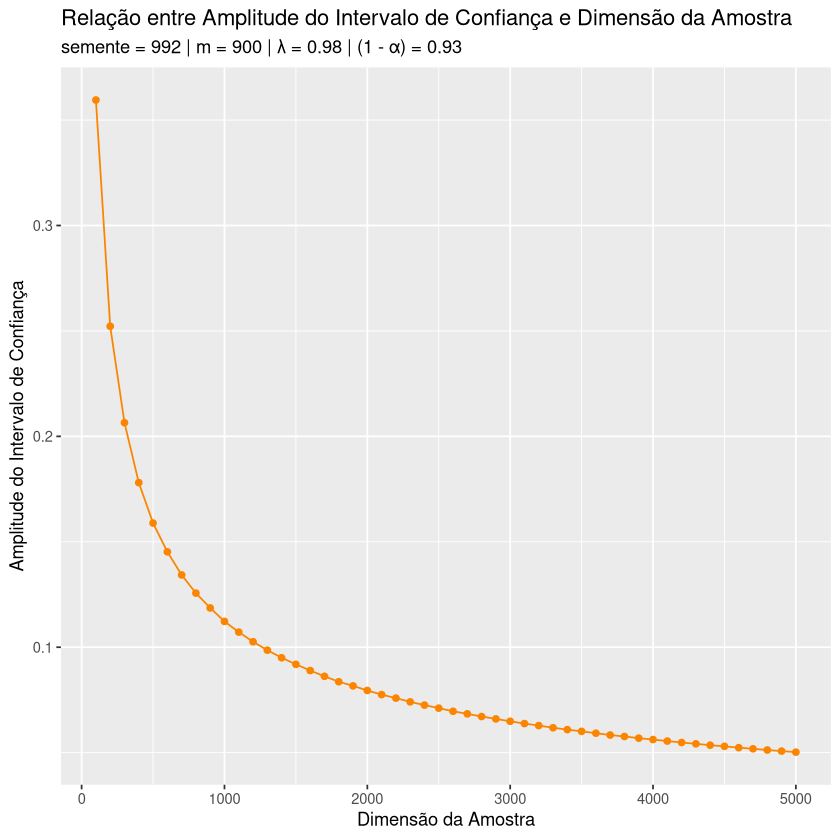

In [20]:
ggplot(df, aes(x = n, y = amplitude)) +
  geom_line(color = "#fb8500") +
  geom_point(color = "#fb8500") +
  xlab("Dimensão da Amostra") +
  ylab("Amplitude do Intervalo de Confiança") +
  labs(title = "Relação entre Amplitude do Intervalo de Confiança e Dimensão da Amostra",
    subtitle = sprintf("semente = %d | m = %d | λ = %.2f | (1 - α) = %.2f",
      SEED, M, LAMBDA, CONF_LEVEL))

In [21]:
ggsave("output.svg", width = 20, height = 14.5, units = "cm")

Através do gráfico obtido, conseguimos concluir que quanto maior a dimensão da amostra
menor será a amplitude do intervalo de confiança. A relação entre estas duas variáveis
é inversamente proporcional.